#2B

In [79]:
import matplotlib.pyplot as plt
from matplotlib import colormaps

In [80]:
import pandas as pd
import numpy as np
import os
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [81]:
#https://drive.google.com/file/d/1b-3gnKTAzbZHRPHnnd5vd9ua9OSS3twI/view?usp=sharing
!gdown 1b-3gnKTAzbZHRPHnnd5vd9ua9OSS3twI

Downloading...
From: https://drive.google.com/uc?id=1b-3gnKTAzbZHRPHnnd5vd9ua9OSS3twI
To: /content/us_stocks_indicators.csv
100% 40.0M/40.0M [00:00<00:00, 121MB/s]


In [82]:
df = pd.read_csv('us_stocks_indicators.csv')

# Contar cuántas filas tienen al menos un valor nulo
num_rows_with_na = df.isnull().any(axis=1).sum()
print(f'Número de filas con al menos un valor nulo: {num_rows_with_na}')

df.head()

Número de filas con al menos un valor nulo: 0


,Year,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Class,Price Var
0,2014,3.878567,-0.129934,1.790827,7.800696,-0.176558,9.122478,7.021603,7.492154,2.218515,...,-0.160494,-0.273101,-0.255555,-0.156224,-0.074997,-0.180232,-0.440493,3.0,1,5.339413
1,2014,0.200522,-0.108851,0.143151,0.275383,-0.176558,0.487538,0.290552,0.178611,-0.041877,...,-0.071844,-0.091054,-0.133905,-0.149948,-0.052301,-0.180232,-0.207595,3.0,1,18.603845
2,2014,0.432598,-0.105983,0.346556,0.498363,0.082470,0.500981,0.332736,0.710699,0.287607,...,-0.102809,0.037929,-0.351691,0.084760,-0.097541,-0.302438,-0.691079,3.0,1,22.628763
3,2014,0.528338,-0.085962,0.628055,0.089929,-0.176558,0.032375,-0.089120,0.427129,-0.296992,...,-0.081957,0.019561,-0.076142,-0.056113,-0.087647,-0.180232,-0.282402,3.0,1,58.666783
4,2014,5.767776,-0.118091,3.321925,9.931729,-0.176558,13.815935,10.011302,7.390123,4.497094,...,-0.143888,-0.322082,-0.483751,-0.268766,-0.090161,-0.180232,-0.360526,3.0,1,8.886701


In [83]:
df_data = df.drop(columns=["Class"])
df_data.head()

,Year,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Price Var
0,2014,3.878567,-0.129934,1.790827,7.800696,-0.176558,9.122478,7.021603,7.492154,2.218515,...,0.324440,-0.160494,-0.273101,-0.255555,-0.156224,-0.074997,-0.180232,-0.440493,3.0,5.339413
1,2014,0.200522,-0.108851,0.143151,0.275383,-0.176558,0.487538,0.290552,0.178611,-0.041877,...,1.303200,-0.071844,-0.091054,-0.133905,-0.149948,-0.052301,-0.180232,-0.207595,3.0,18.603845
2,2014,0.432598,-0.105983,0.346556,0.498363,0.082470,0.500981,0.332736,0.710699,0.287607,...,0.055565,-0.102809,0.037929,-0.351691,0.084760,-0.097541,-0.302438,-0.691079,3.0,22.628763
3,2014,0.528338,-0.085962,0.628055,0.089929,-0.176558,0.032375,-0.089120,0.427129,-0.296992,...,0.634279,-0.081957,0.019561,-0.076142,-0.056113,-0.087647,-0.180232,-0.282402,3.0,58.666783
4,2014,5.767776,-0.118091,3.321925,9.931729,-0.176558,13.815935,10.011302,7.390123,4.497094,...,0.266482,-0.143888,-0.322082,-0.483751,-0.268766,-0.090161,-0.180232,-0.360526,3.0,8.886701


In [84]:
df_target = df['Class'].copy()
df_target.name = 'Class'
df_target.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

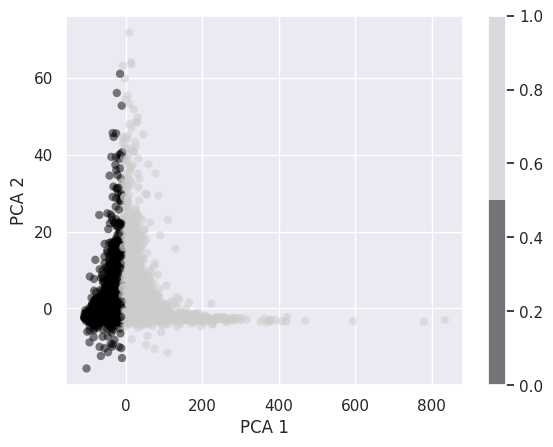

In [85]:
from sklearn.decomposition import PCA


# Creamos nuestro objeto PCA y le indicamos cuántas dimensiones retornar
# (notar que se pueden mantener todos los componentes)
pca = PCA(n_components=2)
#projected = pca.fit_transform(df.iloc[:, 1:])
projected = pca.fit_transform(df_data)
plt.scatter(
    projected[:, 0],
    projected[:, 1],
    c=df_objetivo,
    edgecolor="none",
    alpha=0.5,
    cmap=colormaps["nipy_spectral"].resampled(len(set(df_objetivo))),
)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar()
plt.show()

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
# Haremos el split al mismo tiempo en las features y las etiquetas
# X_train, X_test, y_train, y_test
train_features, test_features, train_classes, test_classes = train_test_split(
    df_data, df_target, test_size=0.1, random_state=0
)

In [88]:
train_features

,Year,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Price Var
4041,2016,-0.320785,0.110159,-0.259360,-0.363254,-0.174002,-0.323330,-0.348245,-0.306554,-0.364745,...,-0.071247,-0.015241,-0.610866,-0.523552,-0.077988,-0.116516,-0.905132,-0.766992,6.0,36.000004
1669,2015,-0.296627,0.052220,-0.260997,-0.282270,0.507726,-0.304395,-0.205889,-0.368069,-0.168472,...,-0.071247,0.669034,0.034664,-0.317197,-0.250597,-0.084318,0.687981,2.695524,6.0,-22.454602
5280,2016,-0.307063,-0.014747,-0.260997,-0.315465,-0.176558,-0.263817,-0.298841,-0.273464,-0.364943,...,-0.071247,-0.125742,-0.162893,-0.268006,-0.032803,-0.099965,-0.180232,0.083159,5.0,-3.505972
641,2014,0.102130,-0.093610,0.216202,-0.222575,-0.176558,-0.133739,-0.199906,-0.214972,-0.307711,...,0.079097,-0.127864,-0.162893,-0.229225,-0.090718,-0.086078,-0.180232,-0.224915,7.0,1.749590
8242,2017,-0.263628,-0.074385,-0.251226,-0.202063,-0.007642,-0.065339,-0.125131,-0.308200,-0.359825,...,-0.071247,-0.027935,-0.162893,0.029179,0.003177,-0.087647,0.205930,-0.035132,9.0,11.490566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,2016,-0.312983,0.127100,-0.257445,-0.343290,-0.176558,-0.318048,-0.325867,-0.296216,-0.321206,...,-0.071247,0.103293,-0.162893,0.001624,-0.087371,-0.064529,-0.180232,0.986745,8.0,10.780580
3264,2015,-0.320080,-0.126057,-0.260155,-0.358999,-0.170076,-0.316581,-0.341926,-0.307457,-0.358899,...,-0.071247,-0.174770,7.208355,-0.338832,-0.225315,-0.099864,-0.382432,-0.167059,9.0,88.274342
9845,2018,-0.288202,-0.088989,-0.233735,-0.324522,-0.176558,-0.316532,-0.301037,-0.294109,-0.074981,...,-2.137276,0.051560,-0.162893,-0.142886,-0.225315,-0.064489,-0.180232,-0.877545,7.0,111.929278
10799,2018,-0.123170,-0.002904,-0.061814,-0.235043,-0.176558,-0.161839,-0.231297,-0.186502,-0.345099,...,0.351459,-0.019444,0.255691,0.120008,0.004671,-0.060436,-0.180232,-0.000861,7.0,15.653484


In [89]:
test_features

,Year,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Price Var
5452,2016,-0.315207,-0.083997,-0.260997,-0.341367,-0.176558,-0.288783,-0.323602,-0.295443,-0.363724,...,2.488520,-0.110925,-0.162893,-0.223510,-0.105003,-0.132826,-0.180232,0.050730,5.0,25.915739
9099,2018,0.805353,-0.114427,0.645834,0.925968,-0.176558,1.695302,1.125006,0.304439,-0.013737,...,-0.071247,-0.125742,-0.285754,-0.234940,-0.030771,-0.087616,-0.180232,-0.163374,2.0,51.967924
11522,2018,-0.320124,0.030393,-0.259906,-0.359770,-0.163266,-0.317847,-0.342314,-0.308813,-0.364105,...,-0.071247,0.561529,0.634070,1.262007,0.562304,-0.188202,0.185085,-0.228231,6.0,-53.421053
5178,2016,-0.294880,0.139208,-0.260997,-0.276715,-0.176558,-0.247953,-0.278492,-0.207103,-0.364943,...,-0.071247,-0.125742,-0.162893,-0.061038,0.192999,-0.127155,-0.180232,1.592574,5.0,-27.096778
5480,2016,0.261898,-0.124889,0.203642,0.317388,-0.176558,-0.324791,-0.025003,0.927616,1.961774,...,0.222032,-0.084746,-0.561681,-0.167175,-0.067528,-0.081694,-0.180232,-0.420962,10.0,17.279462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6676,2017,1.474974,-0.107045,1.108950,1.882837,-0.176558,2.654572,2.275660,0.643214,1.282480,...,0.478706,-0.125742,-0.285754,-0.305154,-0.102194,-0.089718,-0.180232,0.388654,2.0,21.887467
5536,2016,-0.292923,-0.122924,-0.229070,-0.351352,-0.176558,-0.298951,-0.302076,-0.366226,-0.112075,...,-0.071247,0.418689,1.511444,-0.002050,-0.324649,-0.065595,-0.180232,-0.615903,10.0,92.941834
2894,2015,-0.318607,0.050999,-0.260997,-0.352179,-0.176558,-0.310535,-0.338205,-0.296058,-0.364943,...,-0.071247,-0.125742,-0.162893,0.128173,-0.227526,-0.075178,-0.180232,0.293578,5.0,65.760670
8898,2018,0.402486,-0.112675,0.379795,0.318404,-0.176558,0.442491,0.178103,0.523107,0.483907,...,-0.299595,-0.121330,-0.029216,-0.241063,-0.112952,-0.060145,-0.180232,-0.610007,3.0,65.728748


In [90]:
train_classes

4041     1
1669     0
5280     0
641      1
8242     1
        ..
4859     1
3264     1
9845     1
10799    1
2732     1
Name: Class, Length: 10409, dtype: int64

In [91]:
test_classes

5452     1
9099     1
11522    0
5178     0
5480     1
        ..
6676     1
5536     1
2894     1
8898     1
1861     1
Name: Class, Length: 1157, dtype: int64

In [92]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics


# Definimos y ajustamos nuestro clasificador sobre los datos de entrenamiento
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(train_features, train_classes)

# Usamos el clasificador para predecir sobre los datos de test
predicted = classifier.predict(test_features)

expected = test_classes
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))
print()
print("Accuracy: %s" % metrics.balanced_accuracy_score(expected, predicted))

Confusion matrix:
[[475  16]
 [  9 657]]

Accuracy: 0.97694996422084


In [93]:
K = 10
max_accuracy = 0
best_neighbors = 0
for n_neighbors in range(1, K + 1):
    print(f"Evaluando rendimiento para {n_neighbors} vecinos")
    # Definimos y ajustamos nuestro clasificador sobre los datos de entrenamiento
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors).fit(
        train_features, train_classes
    )
    # Usamos el clasificador para predecir sobre los datos de test
    predicted = classifier.predict(test_features)
    accuracy = metrics.balanced_accuracy_score(expected, predicted)
    print(f"K={n_neighbors}: {accuracy:.2f}")
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_neighbors = n_neighbors
print(
    f"El mejor rendimiento se alcanza con {best_neighbors} vecinos "
    f"junto con un accuracy de {max_accuracy}."
)

Evaluando rendimiento para 1 vecinos
K=1: 0.98
Evaluando rendimiento para 2 vecinos
K=2: 0.97
Evaluando rendimiento para 3 vecinos
K=3: 0.98
Evaluando rendimiento para 4 vecinos
K=4: 0.98
Evaluando rendimiento para 5 vecinos
K=5: 0.99
Evaluando rendimiento para 6 vecinos
K=6: 0.99
Evaluando rendimiento para 7 vecinos
K=7: 0.99
Evaluando rendimiento para 8 vecinos
K=8: 0.99
Evaluando rendimiento para 9 vecinos
K=9: 0.99
Evaluando rendimiento para 10 vecinos
K=10: 0.99
El mejor rendimiento se alcanza con 9 vecinos junto con un accuracy de 0.9929236772413962.
